## Lending Club Case Study

#### Introduction
In this case study, we are attempting to solve a real world business problem using Exploratory Data Science techniques. Also, we will develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers.

#### Business Understanding
A **consumer finance company**, which specialises in lending various types of loans to urban customers, when receives a loan application, has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

* If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company
* If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company

The data given to us contains information about past loan applicants and whether they ‘defaulted’ or not. **The aim** is to identify patterns which indicate if a person is likely to **default**, which may be used for taking actions such as `denying the loan`, `reducing the amount of loan`, `lending (to risky applicants) at a higher interest rate`, etc.

#### Business Objective
**Company wants to understand the driving factors** (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment

##### <span style = "color:red">The below code snippet will import the python libraries</span>

In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

##### <span style = "color:red">The below code snippet will read the raw data (csv) and data dictionary (xlsx) files</span>

In [95]:
df_loan = pd.read_csv("loan.csv", low_memory=False)

In [96]:
df_datadic = pd.read_excel("Data_Dictionary.xlsx")

#### Basic Data Understanding commands

In [97]:
df_loan.head(2)

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   

  int_rate  installment grade sub_grade emp_title emp_length home_ownership  \
0   10.65%       162.87     B        B2       NaN  10+ years           RENT   
1   15.27%        59.83     C        C4     Ryder   < 1 year           RENT   

   annual_inc verification_status issue_d  loan_status pymnt_plan  \
0     24000.0            Verified  Dec-11   Fully Paid          n   
1     30000.0     Source Verified  Dec-11  Charged Off          n   

                                                 url  \
0  https://lendingclub.com/browse/loanDetail.acti...   
1  https://lendingclub.com/browse/loanDetail.acti...   

                                                desc      purpose     title  \
0    Borrower added on 12/22/11 > I need to upgra...  credit_card  Computer   
1    Borrower added on 12/22/11 > I plan to use t...          car      bike   

  zip_code addr_state    dti  delinq_2yrs earliest_cr_line  inq_last_6mths  \
0    860xx         AZ  27.65            0           Jan-85               1   
1    309xx         GA   1.00            0           Apr-99               5   

   ...  mo_sin_rcnt_tl  mort_acc  mths_since_recent_bc  \
0  ...             NaN       NaN                   NaN   
1  ...             NaN       NaN                   NaN   

   mths_since_recent_bc_dlq  mths_since_recent_inq  \
0                       NaN                    NaN   
1                       NaN                    NaN   

  mths_since_recent_revol_delinq  num_accts_ever_120_pd num_actv_bc_tl  \
0                            NaN                    NaN            NaN   
1                            NaN                    NaN            NaN   

   num_actv_rev_tl  num_bc_sats  num_bc_tl  num_il_tl  num_op_rev_tl  \
0              NaN          NaN        NaN        NaN            NaN   
1              NaN          NaN        NaN        NaN            NaN   

   num_rev_accts  num_rev_tl_bal_gt_0  num_sats  num_tl_120dpd_2m  \
0            NaN                  NaN       NaN               NaN   
1            NaN                  NaN       NaN               NaN   

  num_tl_30dpd  num_tl_90g_dpd_24m num_tl_op_past_12m pct_tl_nvr_dlq  \
0          NaN                 NaN                NaN            NaN   
1          NaN                 NaN                NaN            NaN   

   percent_bc_gt_75  pub_rec_bankruptcies  tax_liens tot_hi_cred_lim  \
0               NaN                   0.0        0.0             NaN   
1               NaN                   0.0        0.0             NaN   

   total_bal_ex_mort  total_bc_limit  total_il_high_credit_limit  
0                NaN             NaN                         NaN  
1                NaN             NaN                         NaN  

[2 rows x 111 columns]

In [98]:
df_datadic

LoanStatNew                                        Description
0           acc_now_delinq  The number of accounts on which the borrower i...
1     acc_open_past_24mths         Number of trades opened in past 24 months.
2               addr_state  The state provided by the borrower in the loan...
3                 all_util              Balance to credit limit on all trades
4               annual_inc  The self-reported annual income provided by th...
..                     ...                                                ...
112    verification_status  Indicates if income was verified by LC, not ve...
113  verified_status_joint  Indicates if the co-borrowers' joint income wa...
114               zip_code  The first 3 numbers of the zip code provided b...
115                    NaN                                                NaN
116                    NaN  * Employer Title replaces Employer Name for al...

[117 rows x 2 columns]

##### Checking whether all columns are present in both loan and loan column definition dataset

In [99]:
df_datadic = df_datadic.dropna(axis=1, how="all")

In [100]:
set(df_loan.columns) - set(df_datadic["LoanStatNew"])

{'total_rev_hi_lim', 'verification_status_joint'}

##### The above two columns are not present in the data definition so we can drop these columns as they might not be useful

In [101]:
df_loan=df_loan.drop(['total_rev_hi_lim', 'verification_status_joint'],axis=1)

In [102]:
df_loan.shape

(39717, 109)

In [103]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 109 entries, id to total_il_high_credit_limit
dtypes: float64(72), int64(13), object(24)
memory usage: 33.0+ MB


###### <span style = "color:green"> The dataset has 72 `float`, 13 `int`, and 24 `object` variables.</span>

##### <span style = "color:red">The below code snippet of python will check the null values of complete dataset. Let's check </span>

In [104]:
df_loan.isnull().sum()[df_loan.isnull().sum() >0].count()

66

In [105]:
df_loan.isnull().sum()[df_loan.isnull().sum() == 39717].count()

52

###### <span style = "color:green">In dataset, `66` columns have null values and out of 68, for `52` columns, all the rows are null. This means, we can straight away delete these 54 columns  </span>

##### <span style = "color:red">The below code snippet of python will delete the 52 columns that has complete null values. You can see the shape is showing 57 columns left .</span>

In [106]:
df_loan.dropna(axis = 1, how = 'all', inplace = True)
df_loan.shape

(39717, 57)

##### <span style = "color:red">The below code snippet of python will retrieve the number of unique values for each column in the DataFrame.</span>

In [107]:
pd.options.display.max_columns = df_loan.shape[1]
df_loan.describe(include='all').loc['unique', :].sort_values(ascending=True)

application_type                  1
initial_list_status               1
pymnt_plan                        1
next_pymnt_d                      2
term                              2
verification_status               3
loan_status                       3
home_ownership                    5
grade                             7
emp_length                       11
purpose                          14
sub_grade                        35
addr_state                       50
issue_d                          55
last_pymnt_d                    101
last_credit_pull_d              106
int_rate                        371
earliest_cr_line                526
zip_code                        823
revol_util                     1089
title                         19615
desc                          26526
emp_title                     28820
url                           39717
id                              NaN
member_id                       NaN
loan_amnt                       NaN
funded_amnt                 

###### <span style = "color:green"> The above output shows that many variables has either `1` or `2` or `few` unique values which requires exploration</span>
| Columns     | Unique Values|   
|:-------------|:------------:|  
|term |2|
|verification_status|3|
|loan_status|3|
|pymnt_plan|1|
|initial_list_status|1|
|next_pymnt_d|2|
|application_type|1|

###### <span style = "color:green"> Many has `NaN` values which requires exploration, as shown in below table</span>

| Columns | Unique Values|
|:--------|:------------:|
|collections_12_mths_ex_med|NaN|
|policy_code|Nan|
|dti|NaN|
|chargeoff_within_12_mths|NaN|
|tax_liens|NaN|
|pub_rec_bankruptcies|NaN|
|acc_now_delinq| NaN|

#### Data Cleaning & Transformation

##### <span style = "color:red">Drop columns where there is only one value</span>

In [108]:
df_loan.drop(columns=['policy_code', 'pymnt_plan', 'application_type', 'initial_list_status'], inplace=True)

##### <span style = "color:red">Remove those columns which has only 0/NAN values.</span>

In [109]:
df_loan.drop(columns=['tax_liens', 'chargeoff_within_12_mths', 'collections_12_mths_ex_med'], inplace=True)

###### There are few columns like `id`, `member_id`, `url`, `title`, `emp_title`, `zip_code` which has no relevance for current problem statement and does not contributes to the loan deafult. Hence we can remove them.

In [110]:
df_loan.drop(["id", "member_id", "url", "title", "emp_title", "zip_code"], axis = 1, inplace = True)

In [111]:
df_loan.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'desc',
       'purpose', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'acc_now_delinq', 'delinq_amnt',
       'pub_rec_bankruptcies'],
      dtype='object')

In [112]:
df_loan['acc_now_delinq'].value_counts()

acc_now_delinq
0    39717
Name: count, dtype: int64

In [113]:
df_loan['delinq_amnt'].value_counts()

delinq_amnt
0    39717
Name: count, dtype: int64

##### <span style = "color:red">As we can see above that columns `acc_now_delinq`, `delinq_amnt` has only one value, hence we can drop them.</span>

In [114]:
df_loan.drop(columns=['acc_now_delinq', 'delinq_amnt'], inplace=True)

##### <span style = "color:red">Let's check again which other columns have high percentage of null values. </span>

<Axes: >

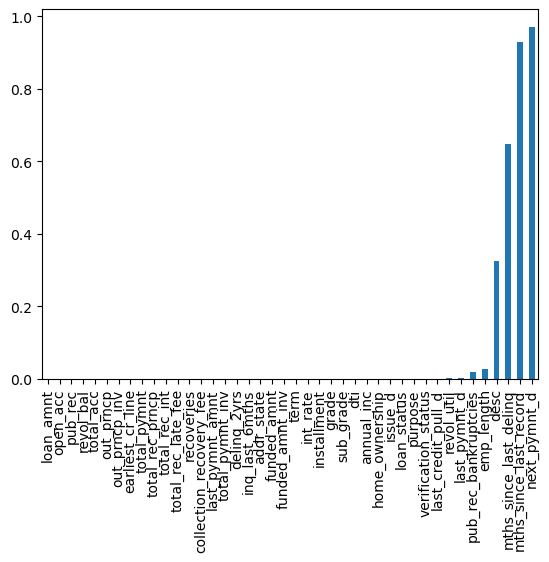

In [115]:
(df_loan.isna().sum()/df_loan.shape[0]).sort_values().plot(kind="bar")

###### <span style = "color:green"> You can see three columns `next_pymnt_d`, `mths_since_last_record`, `mths_since_last_delinq` and `desc` have high percentage of null values and can be deleted. Let's delete </span>

In [116]:
df_loan.drop(columns=['next_pymnt_d', 'mths_since_last_record', 'mths_since_last_delinq','desc'], inplace=True)
df_loan.shape

(39717, 38)

###### <span style = "color:green"> Now we are left with 38 columns. Let's explore missing values </span>

In [117]:
missing = (df_loan.isna().sum()/df_loan.shape[0]).sort_values()
missing[missing != 0]

last_credit_pull_d      0.000050
revol_util              0.001259
last_pymnt_d            0.001788
pub_rec_bankruptcies    0.017549
emp_length              0.027066
dtype: float64

##### <span style = "color:red"> We can delete all the rows of columns`last_credit_pull_d`, `revol_util`, `last_pymnt_d`, `pub_rec_bankruptcies`, `emp_length` which has missing values </span>

In [118]:
df_loan=df_loan[~df_loan.pub_rec_bankruptcies.isna()]
df_loan=df_loan[~df_loan.last_credit_pull_d.isna()]
df_loan = df_loan[~df_loan.emp_length.isna()]
df_loan=df_loan[~df_loan.revol_util.isna()]
df_loan=df_loan[~df_loan.last_pymnt_d.isna()]

In [119]:
(df_loan.isna().sum()/df_loan.shape[0]).sort_values()

loan_amnt                  0.0
pub_rec                    0.0
revol_bal                  0.0
revol_util                 0.0
total_acc                  0.0
out_prncp                  0.0
out_prncp_inv              0.0
total_pymnt                0.0
total_pymnt_inv            0.0
total_rec_prncp            0.0
total_rec_int              0.0
total_rec_late_fee         0.0
recoveries                 0.0
collection_recovery_fee    0.0
last_pymnt_d               0.0
last_pymnt_amnt            0.0
open_acc                   0.0
inq_last_6mths             0.0
earliest_cr_line           0.0
delinq_2yrs                0.0
funded_amnt                0.0
funded_amnt_inv            0.0
term                       0.0
int_rate                   0.0
installment                0.0
grade                      0.0
sub_grade                  0.0
last_credit_pull_d         0.0
emp_length                 0.0
annual_inc                 0.0
verification_status        0.0
issue_d                    0.0
loan_sta

In [120]:
df_loan.shape

(37835, 38)

###### <span style="color:green"> Remove the word "months" from column `term`.</span>

In [121]:
df_loan['term'] = df_loan.term.apply(lambda x: x.split()[0])

In [122]:
df_loan.head(1)

loan_amnt  funded_amnt  funded_amnt_inv term int_rate  installment grade  \
0       5000         5000           4975.0   36   10.65%       162.87     B   

  sub_grade emp_length home_ownership  annual_inc verification_status issue_d  \
0        B2  10+ years           RENT     24000.0            Verified  Dec-11   

  loan_status      purpose addr_state    dti  delinq_2yrs earliest_cr_line  \
0  Fully Paid  credit_card         AZ  27.65            0           Jan-85   

   inq_last_6mths  open_acc  pub_rec  revol_bal revol_util  total_acc  \
0               1         3        0      13648     83.70%          9   

   out_prncp  out_prncp_inv  total_pymnt  total_pymnt_inv  total_rec_prncp  \
0        0.0            0.0  5863.155187          5833.84           5000.0   

   total_rec_int  total_rec_late_fee  recoveries  collection_recovery_fee  \
0         863.16                 0.0         0.0                      0.0   

  last_pymnt_d  last_pymnt_amnt last_credit_pull_d  pub_rec_bankruptcies  
0       Jan-15           171.62             May-16                   0.0

###### <span style="color:green"> As per Data dictionary, modify 10+ with 10 and < 1 with 0 and remove the word `year`.</span>

In [123]:
pd.set_option('future.no_silent_downcasting', True)
emp_length_dict = {
    '< 1 year' : 0,
    '1 year' : 1,
    '2 years' : 2,
    '3 years' : 3,
    '4 years' : 4,
    '5 years' : 5,
    '6 years' : 6,
    '7 years' : 7,
    '8 years' : 8,
    '9 years' : 9,
    '10+ years' : 10
}
df_loan = df_loan.replace({"emp_length": emp_length_dict })

In [124]:
df_loan['emp_length'].head(10)

0    10
1     0
2    10
3    10
4     1
5     3
6     8
7     9
8     4
9     0
Name: emp_length, dtype: object

###### <span style="color:green"> Remove the symbol `%` from int_rate column.</span>

In [125]:
df_loan['int_rate'] = df_loan['int_rate'].str.strip('%').astype('float')
df_loan.head(1)

loan_amnt  funded_amnt  funded_amnt_inv term  int_rate  installment grade  \
0       5000         5000           4975.0   36     10.65       162.87     B   

  sub_grade emp_length home_ownership  annual_inc verification_status issue_d  \
0        B2         10           RENT     24000.0            Verified  Dec-11   

  loan_status      purpose addr_state    dti  delinq_2yrs earliest_cr_line  \
0  Fully Paid  credit_card         AZ  27.65            0           Jan-85   

   inq_last_6mths  open_acc  pub_rec  revol_bal revol_util  total_acc  \
0               1         3        0      13648     83.70%          9   

   out_prncp  out_prncp_inv  total_pymnt  total_pymnt_inv  total_rec_prncp  \
0        0.0            0.0  5863.155187          5833.84           5000.0   

   total_rec_int  total_rec_late_fee  recoveries  collection_recovery_fee  \
0         863.16                 0.0         0.0                      0.0   

  last_pymnt_d  last_pymnt_amnt last_credit_pull_d  pub_rec_bankruptcies  
0       Jan-15           171.62             May-16                   0.0

In [126]:
df_loan.revol_util

0        83.70%
1         9.40%
2        98.50%
3           21%
4        53.90%
          ...  
39562    68.70%
39573       79%
39623    62.90%
39666    34.30%
39680    70.90%
Name: revol_util, Length: 37835, dtype: object

###### <span style="color:green"> Remove the symbol `%` from `revol_util` column and change the data type to `float`.</span>

In [127]:
df_loan['revol_util'] = df_loan['revol_util'].str.strip('%').astype('float')
df_loan.head(1)

loan_amnt  funded_amnt  funded_amnt_inv term  int_rate  installment grade  \
0       5000         5000           4975.0   36     10.65       162.87     B   

  sub_grade emp_length home_ownership  annual_inc verification_status issue_d  \
0        B2         10           RENT     24000.0            Verified  Dec-11   

  loan_status      purpose addr_state    dti  delinq_2yrs earliest_cr_line  \
0  Fully Paid  credit_card         AZ  27.65            0           Jan-85   

   inq_last_6mths  open_acc  pub_rec  revol_bal  revol_util  total_acc  \
0               1         3        0      13648        83.7          9   

   out_prncp  out_prncp_inv  total_pymnt  total_pymnt_inv  total_rec_prncp  \
0        0.0            0.0  5863.155187          5833.84           5000.0   

   total_rec_int  total_rec_late_fee  recoveries  collection_recovery_fee  \
0         863.16                 0.0         0.0                      0.0   

  last_pymnt_d  last_pymnt_amnt last_credit_pull_d  pub_rec_bankruptcies  
0       Jan-15           171.62             May-16                   0.0

In [128]:
df_loan.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies'],
      dtype='object')

In [129]:
df_loan['issue_d'].head(1)

0    Dec-11
Name: issue_d, dtype: object

In [130]:
df_loan['earliest_cr_line'].head(1)

0    Jan-85
Name: earliest_cr_line, dtype: object

In [131]:
df_loan['last_pymnt_d'].head(1)

0    Jan-15
Name: last_pymnt_d, dtype: object

In [132]:
df_loan['last_credit_pull_d'].head(1)

0    May-16
Name: last_credit_pull_d, dtype: object

###### <span style="color:green"> Change the data type of four columns `issue_d`, `earliest_cr_line`, `last_pymnt_d`, `last_credit_pull_d` to datetime</span>

In [133]:
datetime_colmns=['issue_d','earliest_cr_line','last_pymnt_d','last_credit_pull_d']
df_loan.issue_d = pd.to_datetime(df_loan.issue_d, format='%b-%y')
df_loan.earliest_cr_line = pd.to_datetime(df_loan.earliest_cr_line, format='%b-%y')
df_loan.last_pymnt_d = pd.to_datetime(df_loan.last_pymnt_d, format='%b-%y')
df_loan.last_credit_pull_d = pd.to_datetime(df_loan.last_credit_pull_d, format='%b-%y')
df_loan[datetime_colmns].info()

<class 'pandas.core.frame.DataFrame'>
Index: 37835 entries, 0 to 39680
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   issue_d             37835 non-null  datetime64[ns]
 1   earliest_cr_line    37835 non-null  datetime64[ns]
 2   last_pymnt_d        37835 non-null  datetime64[ns]
 3   last_credit_pull_d  37835 non-null  datetime64[ns]
dtypes: datetime64[ns](4)
memory usage: 1.4 MB


###### <span style="color:green"> Create for new columns `earliest_cr_line_month`,`earliest_cr_line_year`,`issue_d_month`,`issue_d_year`.</span>

In [134]:
df_loan['earliest_cr_line_month'] = df_loan['earliest_cr_line'].dt.month
df_loan['earliest_cr_line_year'] = df_loan['earliest_cr_line'].dt.year
df_loan['issue_d_month'] = df_loan['issue_d'].dt.month
df_loan['issue_d_year'] = df_loan['issue_d'].dt.year

In [135]:
df_loan.head(1)

loan_amnt  funded_amnt  funded_amnt_inv term  int_rate  installment grade  \
0       5000         5000           4975.0   36     10.65       162.87     B   

  sub_grade emp_length home_ownership  annual_inc verification_status  \
0        B2         10           RENT     24000.0            Verified   

     issue_d loan_status      purpose addr_state    dti  delinq_2yrs  \
0 2011-12-01  Fully Paid  credit_card         AZ  27.65            0   

  earliest_cr_line  inq_last_6mths  open_acc  pub_rec  revol_bal  revol_util  \
0       1985-01-01               1         3        0      13648        83.7   

   total_acc  out_prncp  out_prncp_inv  total_pymnt  total_pymnt_inv  \
0          9        0.0            0.0  5863.155187          5833.84   

   total_rec_prncp  total_rec_int  total_rec_late_fee  recoveries  \
0           5000.0         863.16                 0.0         0.0   

   collection_recovery_fee last_pymnt_d  last_pymnt_amnt last_credit_pull_d  \
0                      0.0   2015-01-01           171.62         2016-05-01   

   pub_rec_bankruptcies  earliest_cr_line_month  earliest_cr_line_year  \
0                   0.0                       1                   1985   

   issue_d_month  issue_d_year  
0             12          2011

In [136]:
df_loan.shape

(37835, 42)

In [137]:
df_loan.loan_status.value_counts()

loan_status
Fully Paid     31534
Charged Off     5203
Current         1098
Name: count, dtype: int64

###### <span style="color:green"> As we have to understand the differences in the features between loans that have been fully paid or charged off. Therefore, let's not consider loans that are current. So we only keep the loans with status `Fully Paid` or `Charged Off`.</span>

In [138]:
df_loan = df_loan[df_loan['loan_status'].isin(['Fully Paid','Charged Off'])]

In [139]:
df_loan.loan_status.value_counts()

loan_status
Fully Paid     31534
Charged Off     5203
Name: count, dtype: int64

###### <span style="color:green"> We will convert the loan.</span>

###### <span style = "color:green"> Add a new column `defaulted` which takes `1` for **Charged Off** and `0` for **Fully Paid** </span>

In [141]:
pd.options.mode.copy_on_write = True
df_loan['defaulted'] = df_loan['loan_status'].apply(lambda x: 1 if x == 'Charged Off' else 0)
df_loan.head(3)

loan_amnt  funded_amnt  funded_amnt_inv term  int_rate  installment grade  \
0       5000         5000           4975.0   36     10.65       162.87     B   
1       2500         2500           2500.0   60     15.27        59.83     C   
2       2400         2400           2400.0   36     15.96        84.33     C   

  sub_grade emp_length home_ownership  annual_inc verification_status  \
0        B2         10           RENT     24000.0            Verified   
1        C4          0           RENT     30000.0     Source Verified   
2        C5         10           RENT     12252.0        Not Verified   

     issue_d  loan_status         purpose addr_state    dti  delinq_2yrs  \
0 2011-12-01   Fully Paid     credit_card         AZ  27.65            0   
1 2011-12-01  Charged Off             car         GA   1.00            0   
2 2011-12-01   Fully Paid  small_business         IL   8.72            0   

  earliest_cr_line  inq_last_6mths  open_acc  pub_rec  revol_bal  revol_util  \
0       1985-01-01               1         3        0      13648        83.7   
1       1999-04-01               5         3        0       1687         9.4   
2       2001-11-01               2         2        0       2956        98.5   

   total_acc  out_prncp  out_prncp_inv  total_pymnt  total_pymnt_inv  \
0          9        0.0            0.0  5863.155187          5833.84   
1          4        0.0            0.0  1008.710000          1008.71   
2         10        0.0            0.0  3005.666844          3005.67   

   total_rec_prncp  total_rec_int  total_rec_late_fee  recoveries  \
0          5000.00         863.16                 0.0        0.00   
1           456.46         435.17                 0.0      117.08   
2          2400.00         605.67                 0.0        0.00   

   collection_recovery_fee last_pymnt_d  last_pymnt_amnt last_credit_pull_d  \
0                     0.00   2015-01-01           171.62         2016-05-01   
1                     1.11   2013-04-01           119.66         2013-09-01   
2                     0.00   2014-06-01           649.91         2016-05-01   

   pub_rec_bankruptcies  earliest_cr_line_month  earliest_cr_line_year  \
0                   0.0                       1                   1985   
1                   0.0                       4                   1999   
2                   0.0                      11                   2001   

   issue_d_month  issue_d_year  defaulted  
0             12          2011          0  
1             12          2011          1  
2             12          2011          0

##### <span style = "color:red"> Let's do some outlier treatment </span>

<Axes: ylabel='annual_inc'>

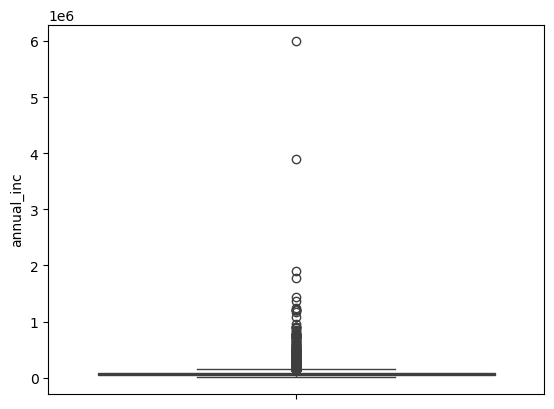

In [142]:
sns.boxplot(df_loan['annual_inc'])

###### <span style = "color:green"> The above boxplot clearly indicates we have outlier present in column `annual_inc` and let's fix it IQR method </span>

In [143]:
iqr_method = df_loan.annual_inc.quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])
iqr_method

0.50     60000.0
0.75     83000.0
0.90    117000.0
0.95    142000.0
0.97    166000.0
0.98    189000.0
0.99    235000.0
Name: annual_inc, dtype: float64

###### <span style = "color:green"> We will consider threshold for removing outliers as 0.95 </span>

In [144]:
annual_inc_95_per = df_loan['annual_inc'].quantile(0.95)
df_loan = df_loan[df_loan.annual_inc <= annual_inc_95_per]

<Axes: ylabel='annual_inc'>

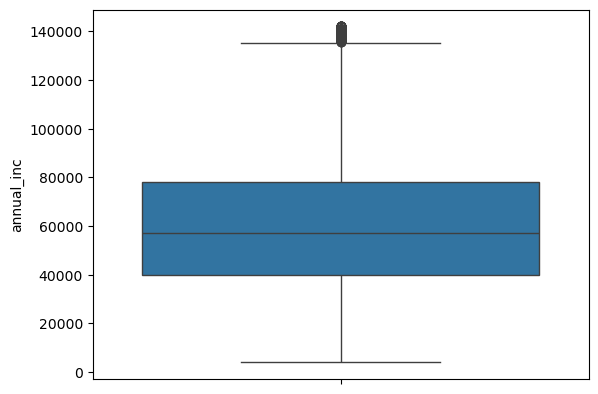

In [145]:
sns.boxplot(df_loan.annual_inc)

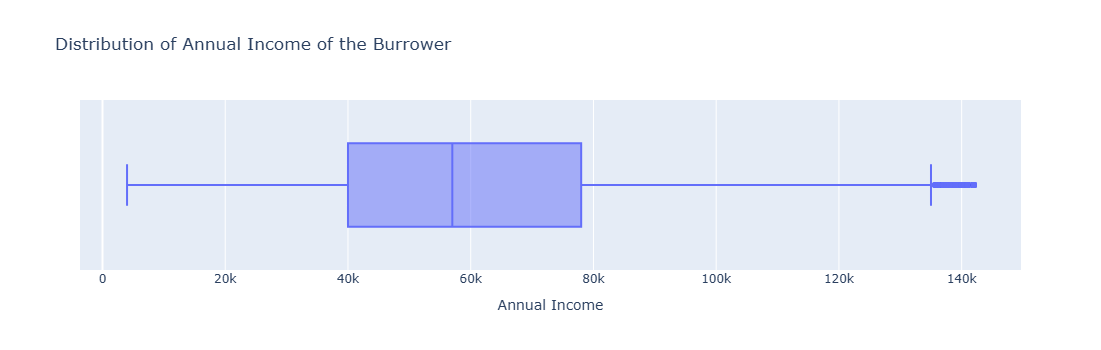

In [146]:
import plotly.express as px
px.box(df_loan,x='annual_inc',width=750,height=350,title='Distribution of Annual Income of the Burrower',labels={'annual_inc':'Annual Income'}).show()

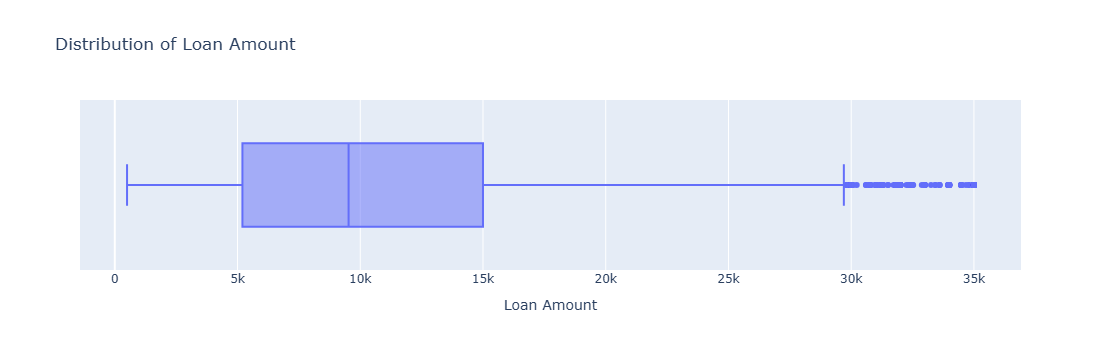

In [147]:
px.box(df_loan,x='loan_amnt',width=750,height=350,title='Distribution of Loan Amount',labels={'loan_amnt':'Loan Amount'}).show()

###### <span style ="color:green"> Upper fence turns out to be 29.175k =29175 whereas max is 35k=35000 which is not much more then upper fence thus will not have much impact on the analysis.</span>

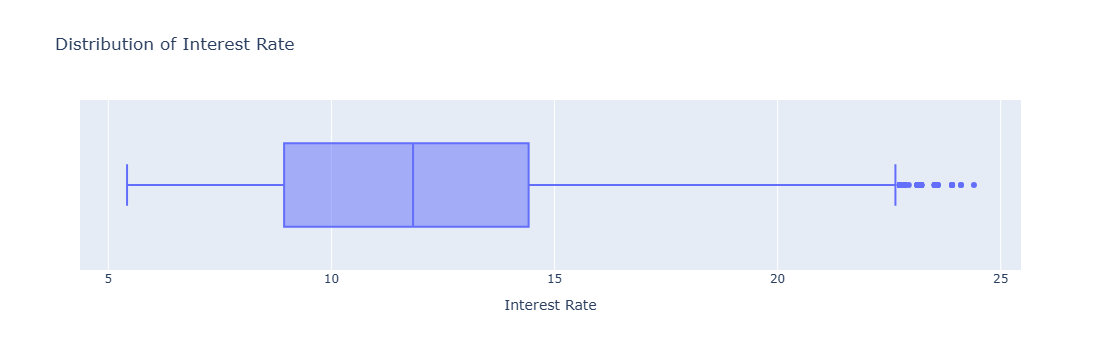

In [148]:
px.box(df_loan,x='int_rate',width=750,height=350,title='Distribution of Interest Rate',labels={'int_rate':'Interest Rate'}).show()

###### <span style ="color:green"> Upper fence turns out to be 22.64 whereas max is 24.4 which is not much more then upper fence thus will not have much impact on the analysis.</span>

In [149]:
df_loan.to_csv('loan250125.csv', index=False)

### Univariate Analysis

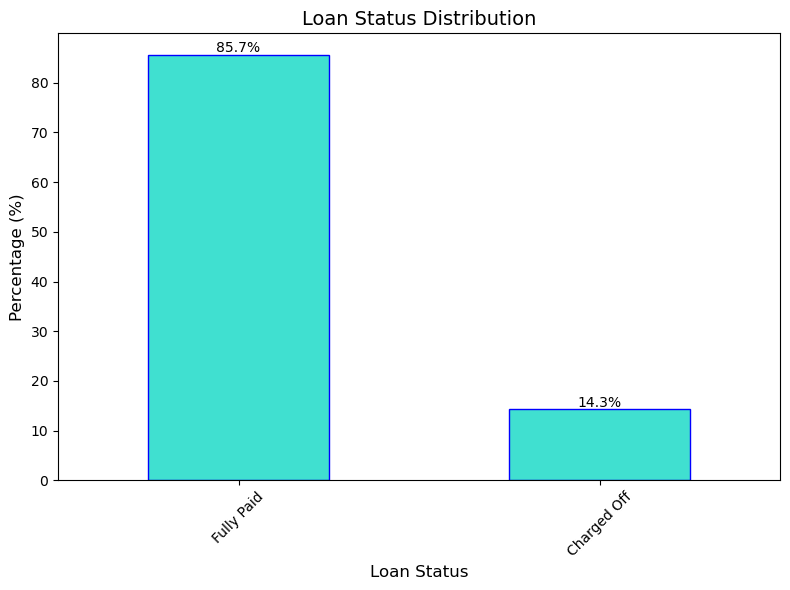

In [150]:
loan_status_per = df_loan['loan_status'].value_counts(normalize=True) * 100
plt.figure(figsize=(8, 6))
loan_status_per.sort_values(ascending=False).plot(kind='bar', color='turquoise', edgecolor='blue')
for i, val in enumerate(loan_status_per.sort_values(ascending=False)):
    plt.text(i, val + 0.5, f'{val:.1f}%', ha='center', fontsize=10)
plt.title('Loan Status Distribution', fontsize=14)
plt.xlabel('Loan Status', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### <span style ="color:green"> **Observation**: Defaulted loan is **14.3%** compared to Fully Paid which is `85.7%`.</span>

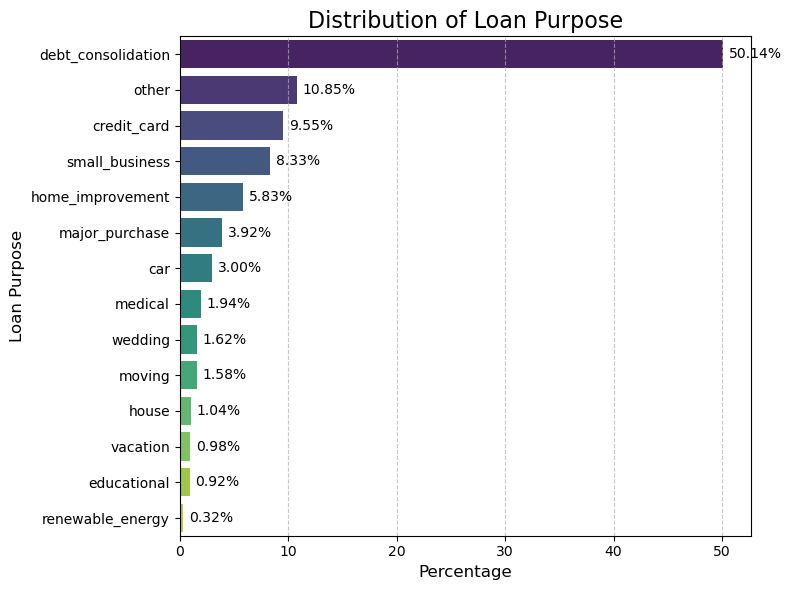

In [151]:
import warnings
warnings.filterwarnings('ignore')
defaulted_loans = df_loan[df_loan['defaulted'] == 1]
purpose_distribution = (
    defaulted_loans['purpose']
    .value_counts(normalize=True)
    .mul(100)
    .sort_values(ascending=False)
)
plt.figure(figsize=(8, 6))
sns.barplot(
    x=purpose_distribution.values, 
    y=purpose_distribution.index, 
    palette="viridis"
)

for i, value in enumerate(purpose_distribution.values):
    plt.text(value + 0.5, i, f"{value:.2f}%", va='center', fontsize=10)


plt.title("Distribution of Loan Purpose", fontsize=16)
plt.xlabel("Percentage", fontsize=12)
plt.ylabel("Loan Purpose", fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.tight_layout()

plt.show()

##### <span style ="color:green"> **Observation**: People who took Debt Consolidation Loan are the one who defaulted most (50.14%).</span>

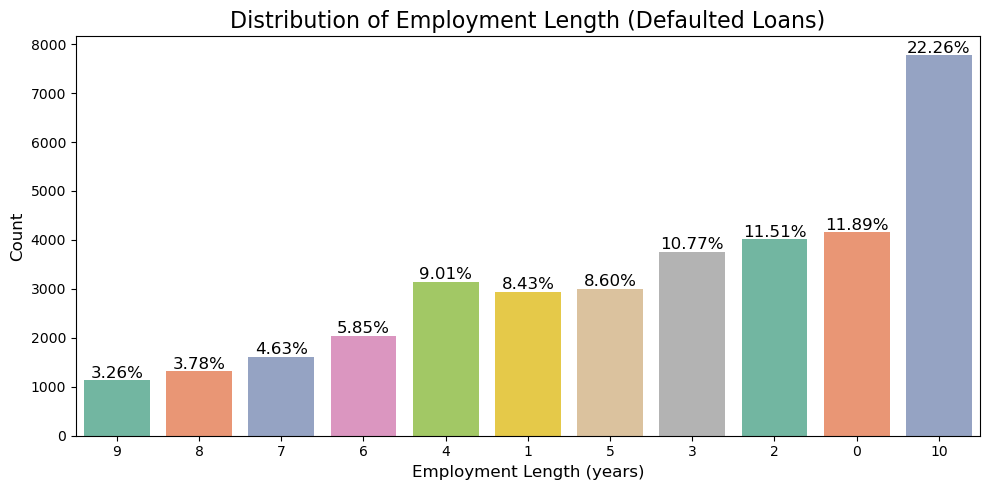

In [179]:
defaulted_loans = df_loan[df_loan['defaulted'] == 1]
emp_length_order = (
    defaulted_loans['emp_length']
    .value_counts(ascending=True)
    .index
)

plt.figure(figsize=(10, 5))
palette = sns.color_palette("Set2", n_colors=len(emp_length_order))
ax = sns.countplot(
    x=df_loan['emp_length'], 
    order=emp_length_order,
    palette=palette
)

total_loans = df_loan['emp_length'].count()
for p in ax.patches:
    height = p.get_height()
    percentage = (height / total_loans) * 100
    ax.text(p.get_x() + p.get_width() / 2, height + 50, f'{percentage:.2f}%', 
            ha='center', fontsize=12, color='black')

ax.set_xlabel('Employment Length (years)', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.set_title('Distribution of Employment Length (Defaulted Loans)', fontsize=16)

plt.tight_layout()
plt.show()

##### <span style ="color:green"> **Observation**: People with 10> or <0 years of employment length have defualted the most.</span>

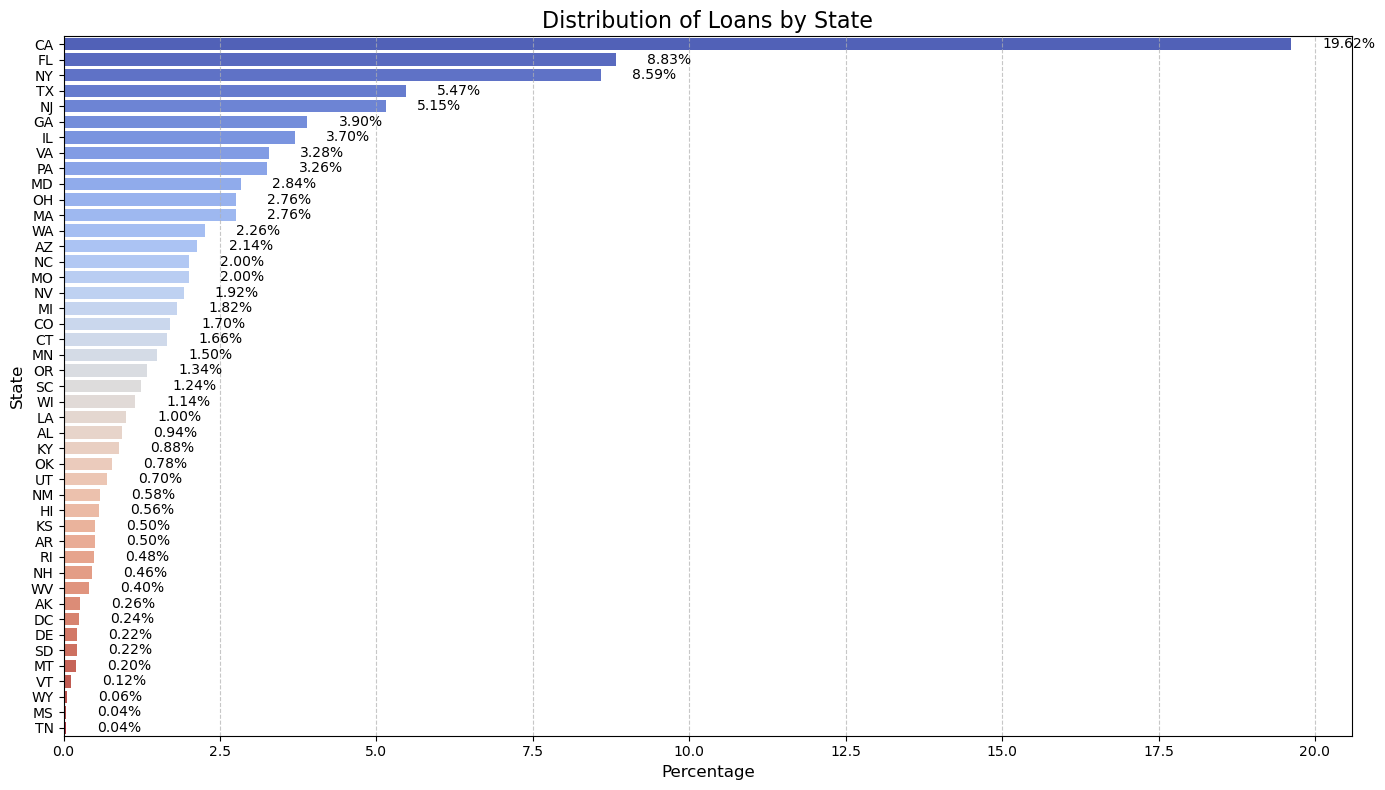

In [153]:
defaulted_loans = df_loan[df_loan['defaulted'] == 1]

state_distribution = (
    defaulted_loans['addr_state']
    .value_counts(normalize=True)
    .mul(100)
    .sort_values(ascending=False)  # Sort in descending order
)

plt.figure(figsize=(14, 8))
sns.barplot(
    x=state_distribution.values, 
    y=state_distribution.index, 
    palette="coolwarm"
)

for i, value in enumerate(state_distribution.values):
    plt.text(value + 0.5, i, f"{value:.2f}%", va='center', fontsize=10)

plt.title("Distribution of Loans by State", fontsize=16)
plt.xlabel("Percentage", fontsize=12)
plt.ylabel("State", fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

##### <span style ="color:green"> **Observation**: People from `CA` state have defualted the most.</span>

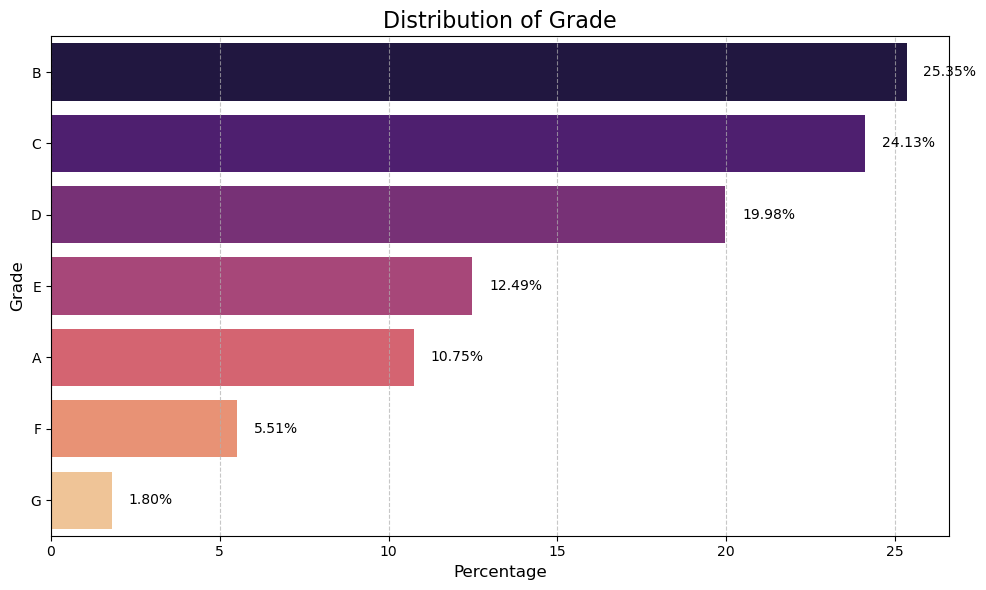

In [154]:
grade_distribution = (
    defaulted_loans['grade']
    .value_counts(normalize=True)
    .mul(100)
    .sort_values(ascending=False)  # Sort in descending order
)

plt.figure(figsize=(10, 6))
sns.barplot(
    x=grade_distribution.values, 
    y=grade_distribution.index, 
    palette="magma"
)

for i, value in enumerate(grade_distribution.values):
    plt.text(value + 0.5, i, f"{value:.2f}%", va='center', fontsize=10)

plt.title("Distribution of Grade", fontsize=16)
plt.xlabel("Percentage", fontsize=12)
plt.ylabel("Grade", fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

##### <span style ="color:green"> **Observation**: People who have LC assigned loan grade of `B` & `C` defualted the most.</span>

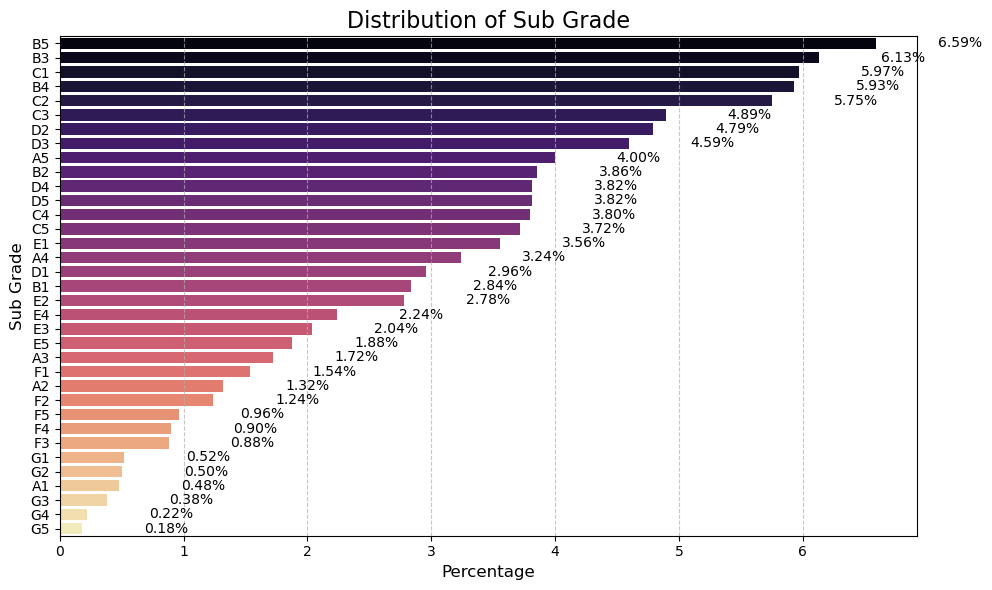

In [155]:
sub_grade_distribution = (
    defaulted_loans['sub_grade']
    .value_counts(normalize=True)
    .mul(100)
    .sort_values(ascending=False)  # Sort in descending order
)

plt.figure(figsize=(10, 6))
sns.barplot(
    x=sub_grade_distribution.values, 
    y=sub_grade_distribution.index, 
    palette="magma"
)

for i, value in enumerate(sub_grade_distribution.values):
    plt.text(value + 0.5, i, f"{value:.2f}%", va='center', fontsize=10)

plt.title("Distribution of Sub Grade", fontsize=16)
plt.xlabel("Percentage", fontsize=12)
plt.ylabel("Sub Grade", fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

##### <span style ="color:green"> **Observation**: The top six LC assigned loan subgrade `B5`,`B3`,`C1`,`B4`,`C2`, and `C3` defualted the most.</span>

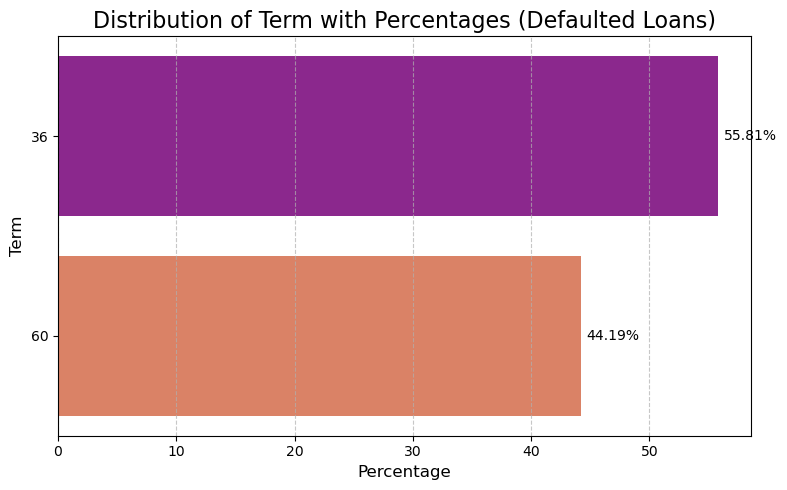

In [156]:
term_distribution = (
    defaulted_loans['term']
    .value_counts(normalize=True)
    .mul(100)
    .sort_values(ascending=False)
)

plt.figure(figsize=(8, 5))
sns.barplot(
    x=term_distribution.values, 
    y=term_distribution.index, 
    palette="plasma"
)

for i, value in enumerate(term_distribution.values):
    plt.text(value + 0.5, i, f"{value:.2f}%", va='center', fontsize=10)

plt.title("Distribution of Term with Percentages (Defaulted Loans)", fontsize=16)
plt.xlabel("Percentage", fontsize=12)
plt.ylabel("Term", fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

##### <span style ="color:green"> **Observation**: People who were suppose to pay the loan in 36 months have defualted the most.</span>

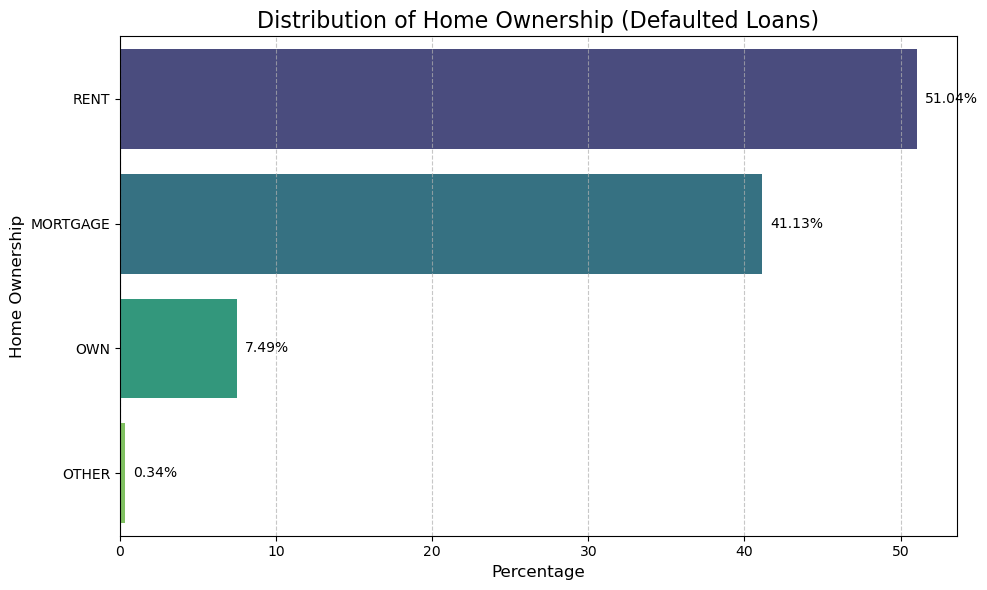

In [157]:
home_ownership_distribution = (
    defaulted_loans['home_ownership']
    .value_counts(normalize=True)
    .mul(100)
    .sort_values(ascending=False)  # Sort in descending order
)

plt.figure(figsize=(10, 6))
sns.barplot(
    x=home_ownership_distribution.values, 
    y=home_ownership_distribution.index, 
    palette="viridis"
)

for i, value in enumerate(home_ownership_distribution.values):
    plt.text(value + 0.5, i, f"{value:.2f}%", va='center', fontsize=10)

plt.title("Distribution of Home Ownership (Defaulted Loans)", fontsize=16)
plt.xlabel("Percentage", fontsize=12)
plt.ylabel("Home Ownership", fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

##### <span style ="color:green"> **Observation**: People staying on Rent have defualted the most.</span>

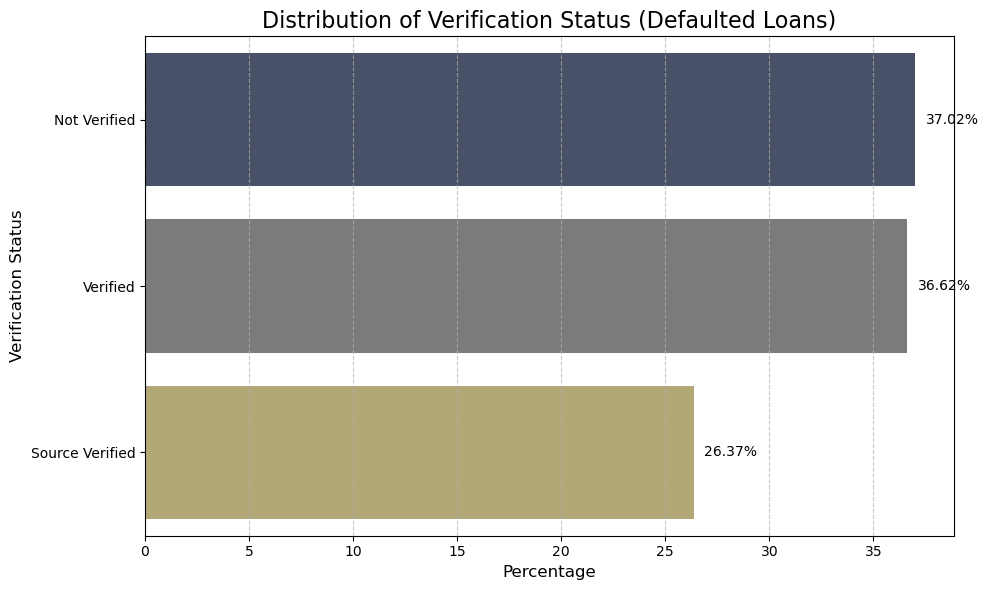

In [158]:
verification_status_distribution = (
    defaulted_loans['verification_status']
    .value_counts(normalize=True)
    .mul(100)
    .sort_values(ascending=False)  # Sort in descending order
)

plt.figure(figsize=(10, 6))
sns.barplot(
    x=verification_status_distribution.values, 
    y=verification_status_distribution.index, 
    palette="cividis"
)

for i, value in enumerate(verification_status_distribution.values):
    plt.text(value + 0.5, i, f"{value:.2f}%", va='center', fontsize=10)

plt.title("Distribution of Verification Status (Defaulted Loans)", fontsize=16)
plt.xlabel("Percentage", fontsize=12)
plt.ylabel("Verification Status", fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

##### <span style ="color:green"> **Observation**: People whose income was verified & not verified by LC, have defualted the most.</span>

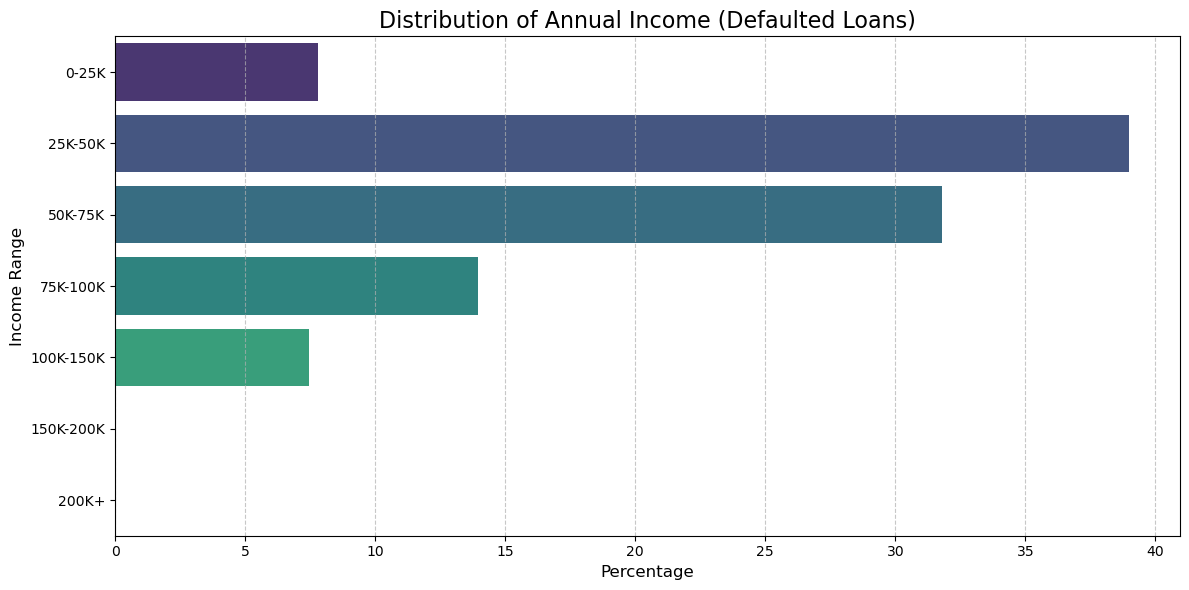

In [159]:
income_bins = [0, 25000, 50000, 75000, 100000, 150000, 200000, float('inf')]
income_labels = ['0-25K', '25K-50K', '50K-75K', '75K-100K', '100K-150K', '150K-200K', '200K+']
defaulted_loans['income_range'] = pd.cut(
    defaulted_loans['annual_inc'], 
    bins=income_bins, 
    labels=income_labels,
    include_lowest=True
)

income_distribution = defaulted_loans['income_range'].value_counts(normalize=True).mul(100)

plt.figure(figsize=(12, 6))
sns.barplot(
    x=income_distribution.values, 
    y=income_distribution.index, 
    palette="viridis"
)

plt.title("Distribution of Annual Income (Defaulted Loans)", fontsize=16)
plt.xlabel("Percentage", fontsize=12)
plt.ylabel("Income Range", fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

##### <span style ="color:green"> **Observation**: People having annual income between 25K - 50K, have defualted the most.</span>

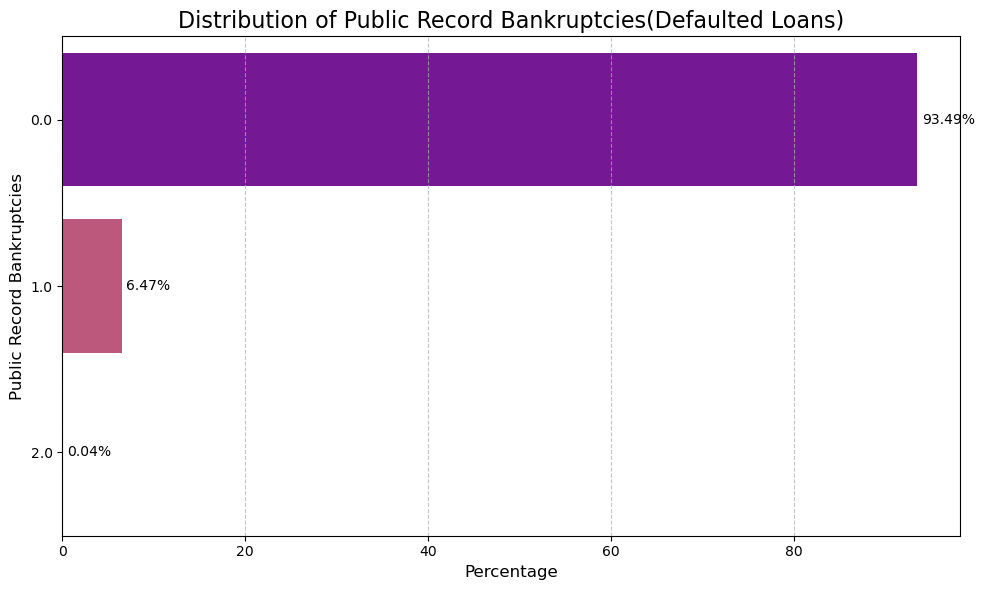

In [160]:
bankruptcies_distribution = (
    defaulted_loans['pub_rec_bankruptcies']
    .value_counts(normalize=True)
    .mul(100)
    .sort_values(ascending=False)  # Sort in descending order
)

plt.figure(figsize=(10, 6))
sns.barplot(
    x=bankruptcies_distribution.values, 
    y=bankruptcies_distribution.index.astype(str), 
    palette="plasma"
)

for i, value in enumerate(bankruptcies_distribution.values):
    plt.text(
        value + 0.5,  # Offset slightly to the right of the bar
        i,  # Vertical alignment remains at the center of the bar
        f"{value:.2f}%", 
        va='center', 
        fontsize=10, 
        color="black"
    )

plt.title("Distribution of Public Record Bankruptcies(Defaulted Loans)", fontsize=16)
plt.xlabel("Percentage", fontsize=12)
plt.ylabel("Public Record Bankruptcies", fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

##### <span style ="color:green"> **Observation**: Majority of the borrowers have no record of Public Recorded Bankruptcy.</span>

### Segmented Univariate Analysis

###### <span style = "color:green"> Distribution of Term based on loan_status</span>

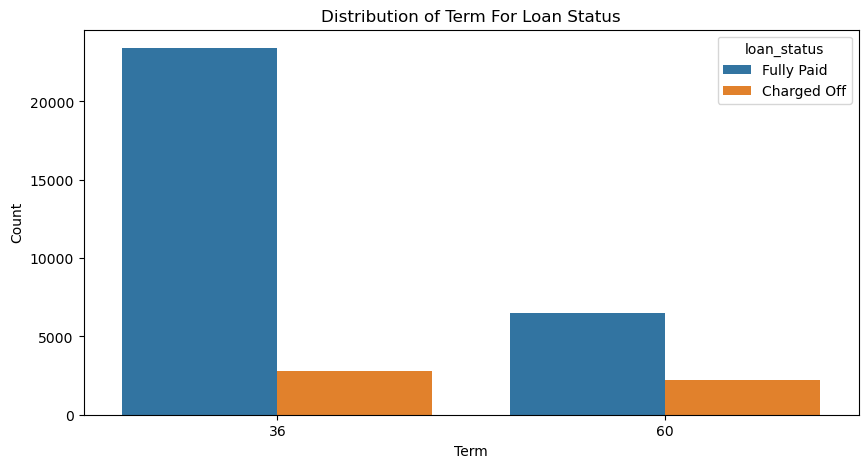

In [162]:
plt.figure(figsize=(10,5))
sns.countplot(data=df_loan,x='term',hue='loan_status')
plt.xlabel('Term')
plt.ylabel('Count')
plt.title('Distribution of Term For Loan Status',fontsize=12)
plt.show()

###### <span style = "color:green"> Observation : The 36 months term has higher chances of default. </Span>

###### <span style = "color:green"> Distribution of purpose based on loan_status</span>

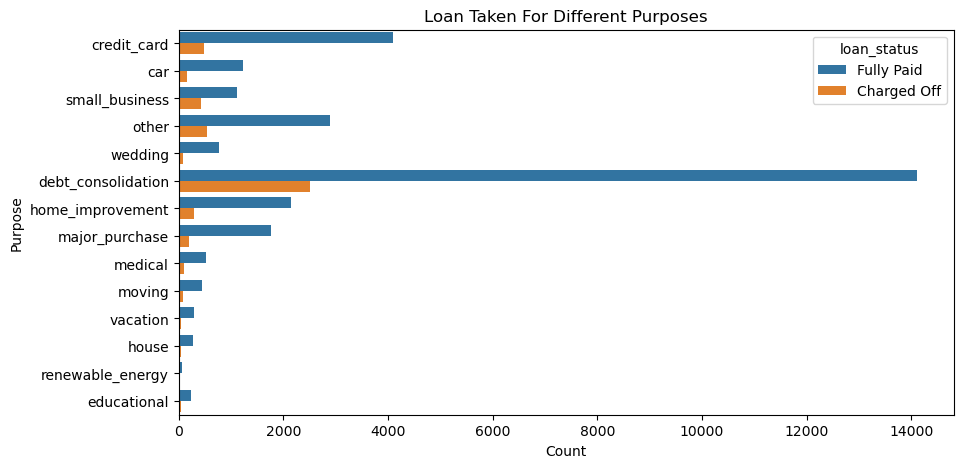

In [164]:
plt.figure(figsize=(10,5))
sns.countplot(data=df_loan,y='purpose',hue='loan_status')
plt.xlabel('Count')
plt.ylabel('Purpose')
plt.title('Loan Taken For Different Purposes',fontsize=12)
plt.show()

###### <span style = "color:green"> Observation : Debt Consolidation is the most popular loan purpose and has highest number of fully paid loan and defaulted loan.</Span>

###### <span style = "color:green"> Distribution of int_amnt based on loan_status </span>

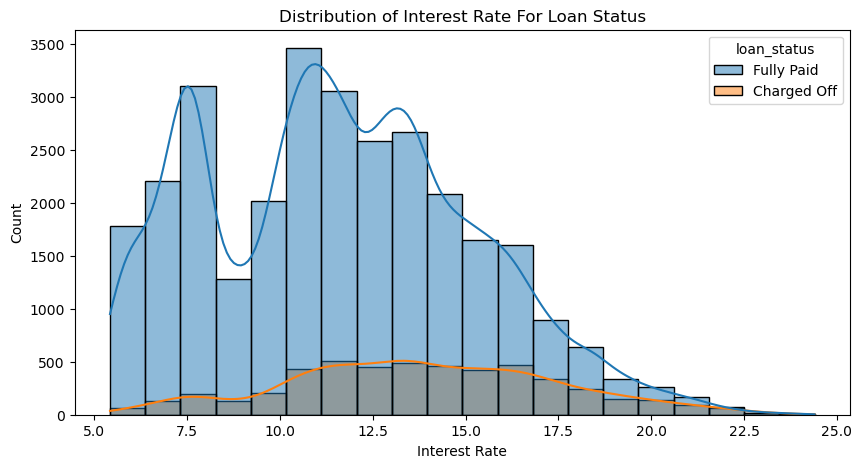

In [165]:
plt.figure(figsize=(10,5))
sns.histplot(data=df_loan,x='int_rate',hue='loan_status', bins=20, kde=True)
plt.xlabel('Interest Rate')
plt.ylabel('Count')
plt.title('Distribution of Interest Rate For Loan Status',fontsize=12)
plt.show()

###### <span style = "color:green"> The default loan amount increases with interest rate and shows are decline aftre 17.5 % interest rate. </span>

### Bivariate Analysis

###### <span style = "color:green"> DTI Ratio vs Loan Status </span>

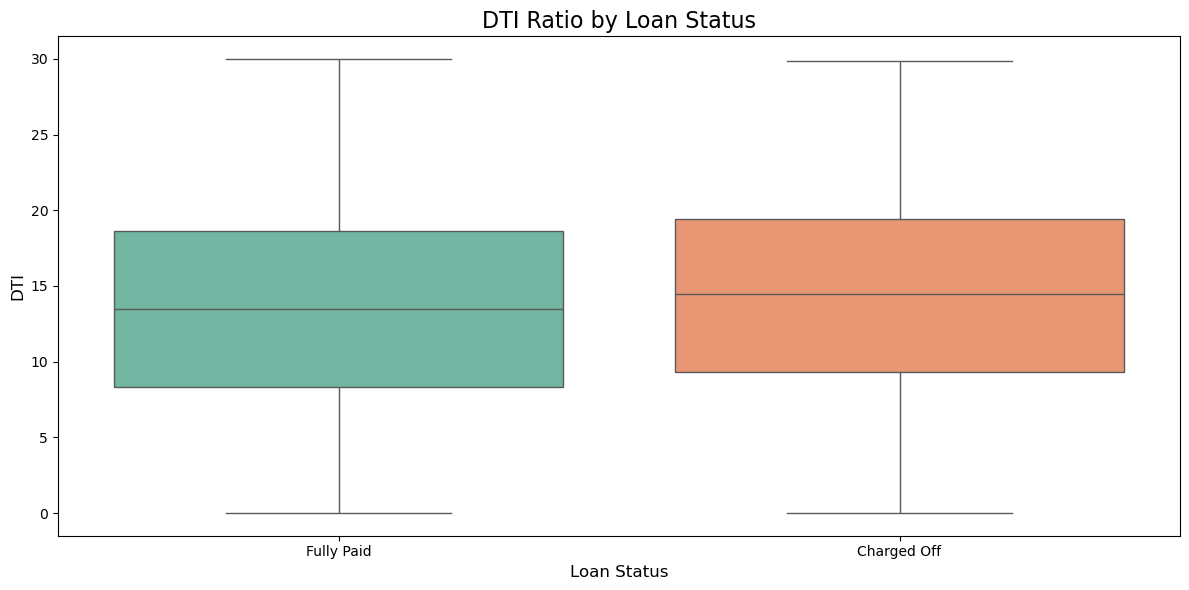

In [174]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_loan, x='loan_status', y='dti', palette='Set2')
plt.title('DTI Ratio by Loan Status', fontsize=16)
plt.xlabel('Loan Status', fontsize=12)
plt.ylabel('DTI', fontsize=12)
plt.tight_layout()
plt.show()


###### <span style = "color:green"> Observation : Defaulted loans (Charged Off) generally have higher median DTI ratios compared to fully paid loans. People with a higher percentage of debt relative to income are at greater risk of default.

###### <span style ="color:green"> Purpose of Loan vs Loan Amount </span>

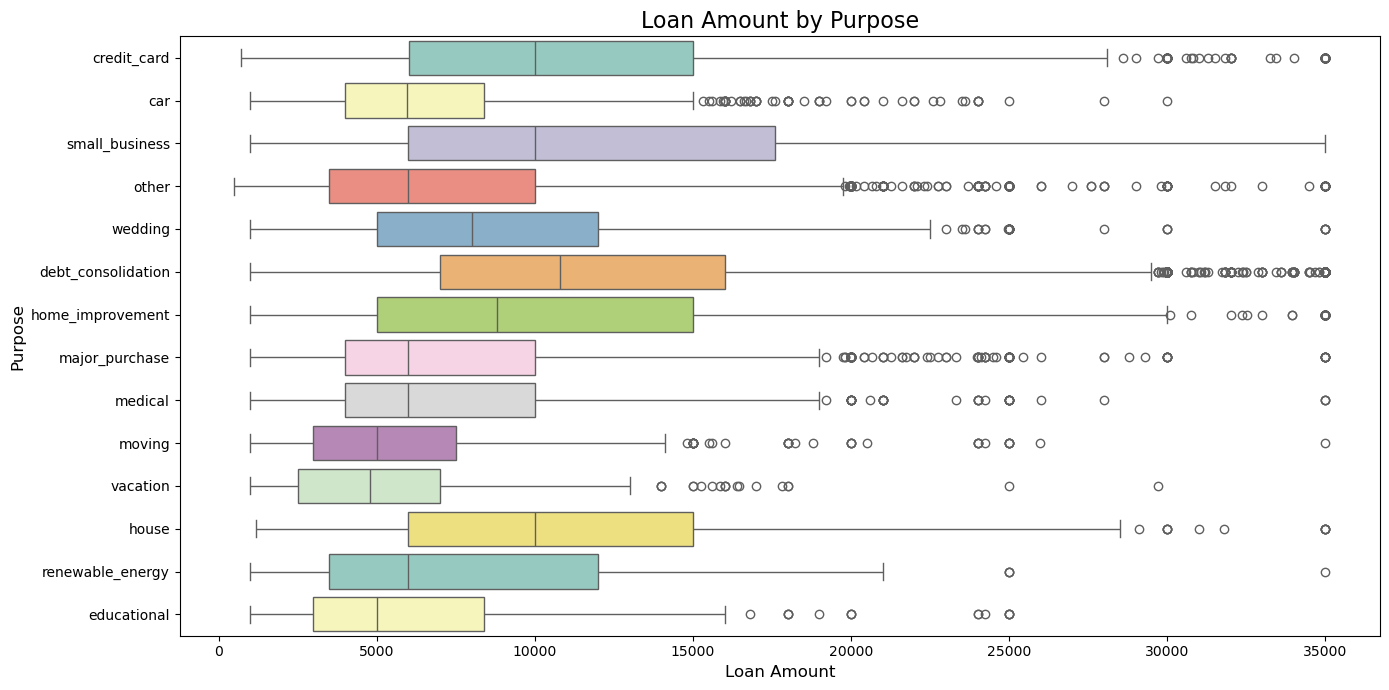

In [170]:
plt.figure(figsize=(14, 7))
sns.boxplot(data=df_loan, y='purpose', x='loan_amnt', palette='Set3')
plt.title('Loan Amount by Purpose', fontsize=16)
plt.xlabel('Loan Amount', fontsize=12)
plt.ylabel('Purpose', fontsize=12)
plt.tight_layout()
plt.show()

###### <span style = "color:green"> Observation : Loans for small_business and debt consolidation tend to involve higher amounts. Higher loan amounts may carry greater risk of default depending on the borrower's purpose. </span>

###### <span style = "color:green"> Relationship Between Interest Rate and Grade </span>

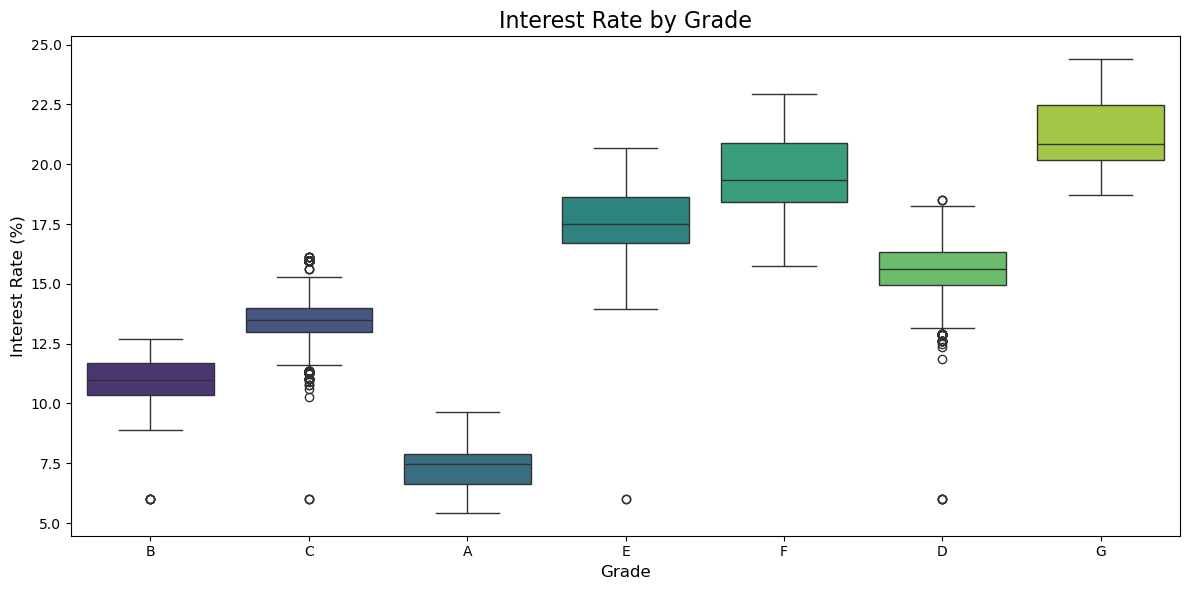

In [172]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_loan, x='grade', y='int_rate', palette='viridis')
plt.title('Interest Rate by Grade', fontsize=16)
plt.xlabel('Grade', fontsize=12)
plt.ylabel('Interest Rate (%)', fontsize=12)
plt.tight_layout()
plt.show()

###### <span style = "color:green"> Observation : Interest rates increase with lower loan grades. Borrowers with lower grades (e.g., E, F) pay significantly higher interest rates, reflecting the increased risk associated with these loans.</span>

### Correlation Analysis

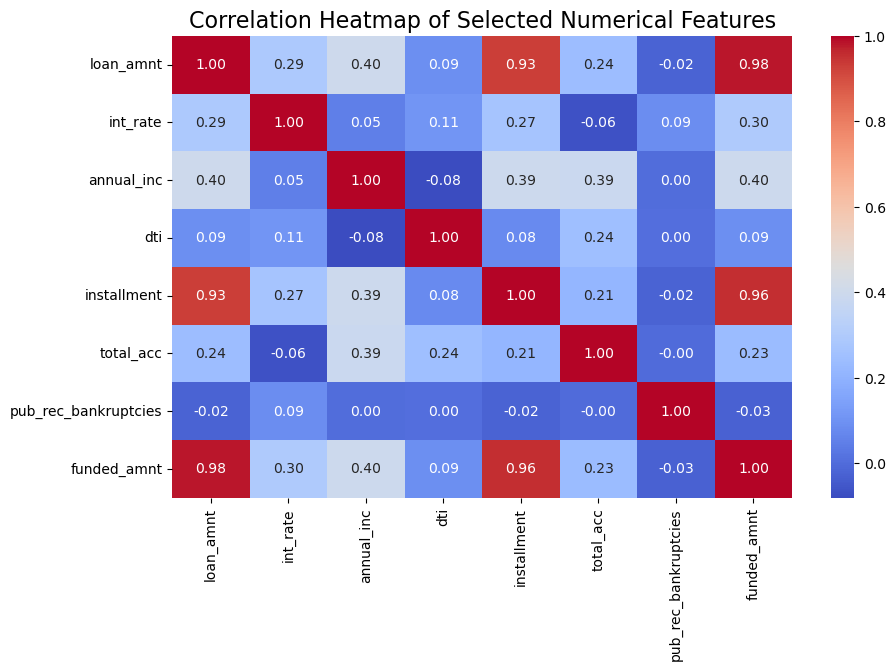

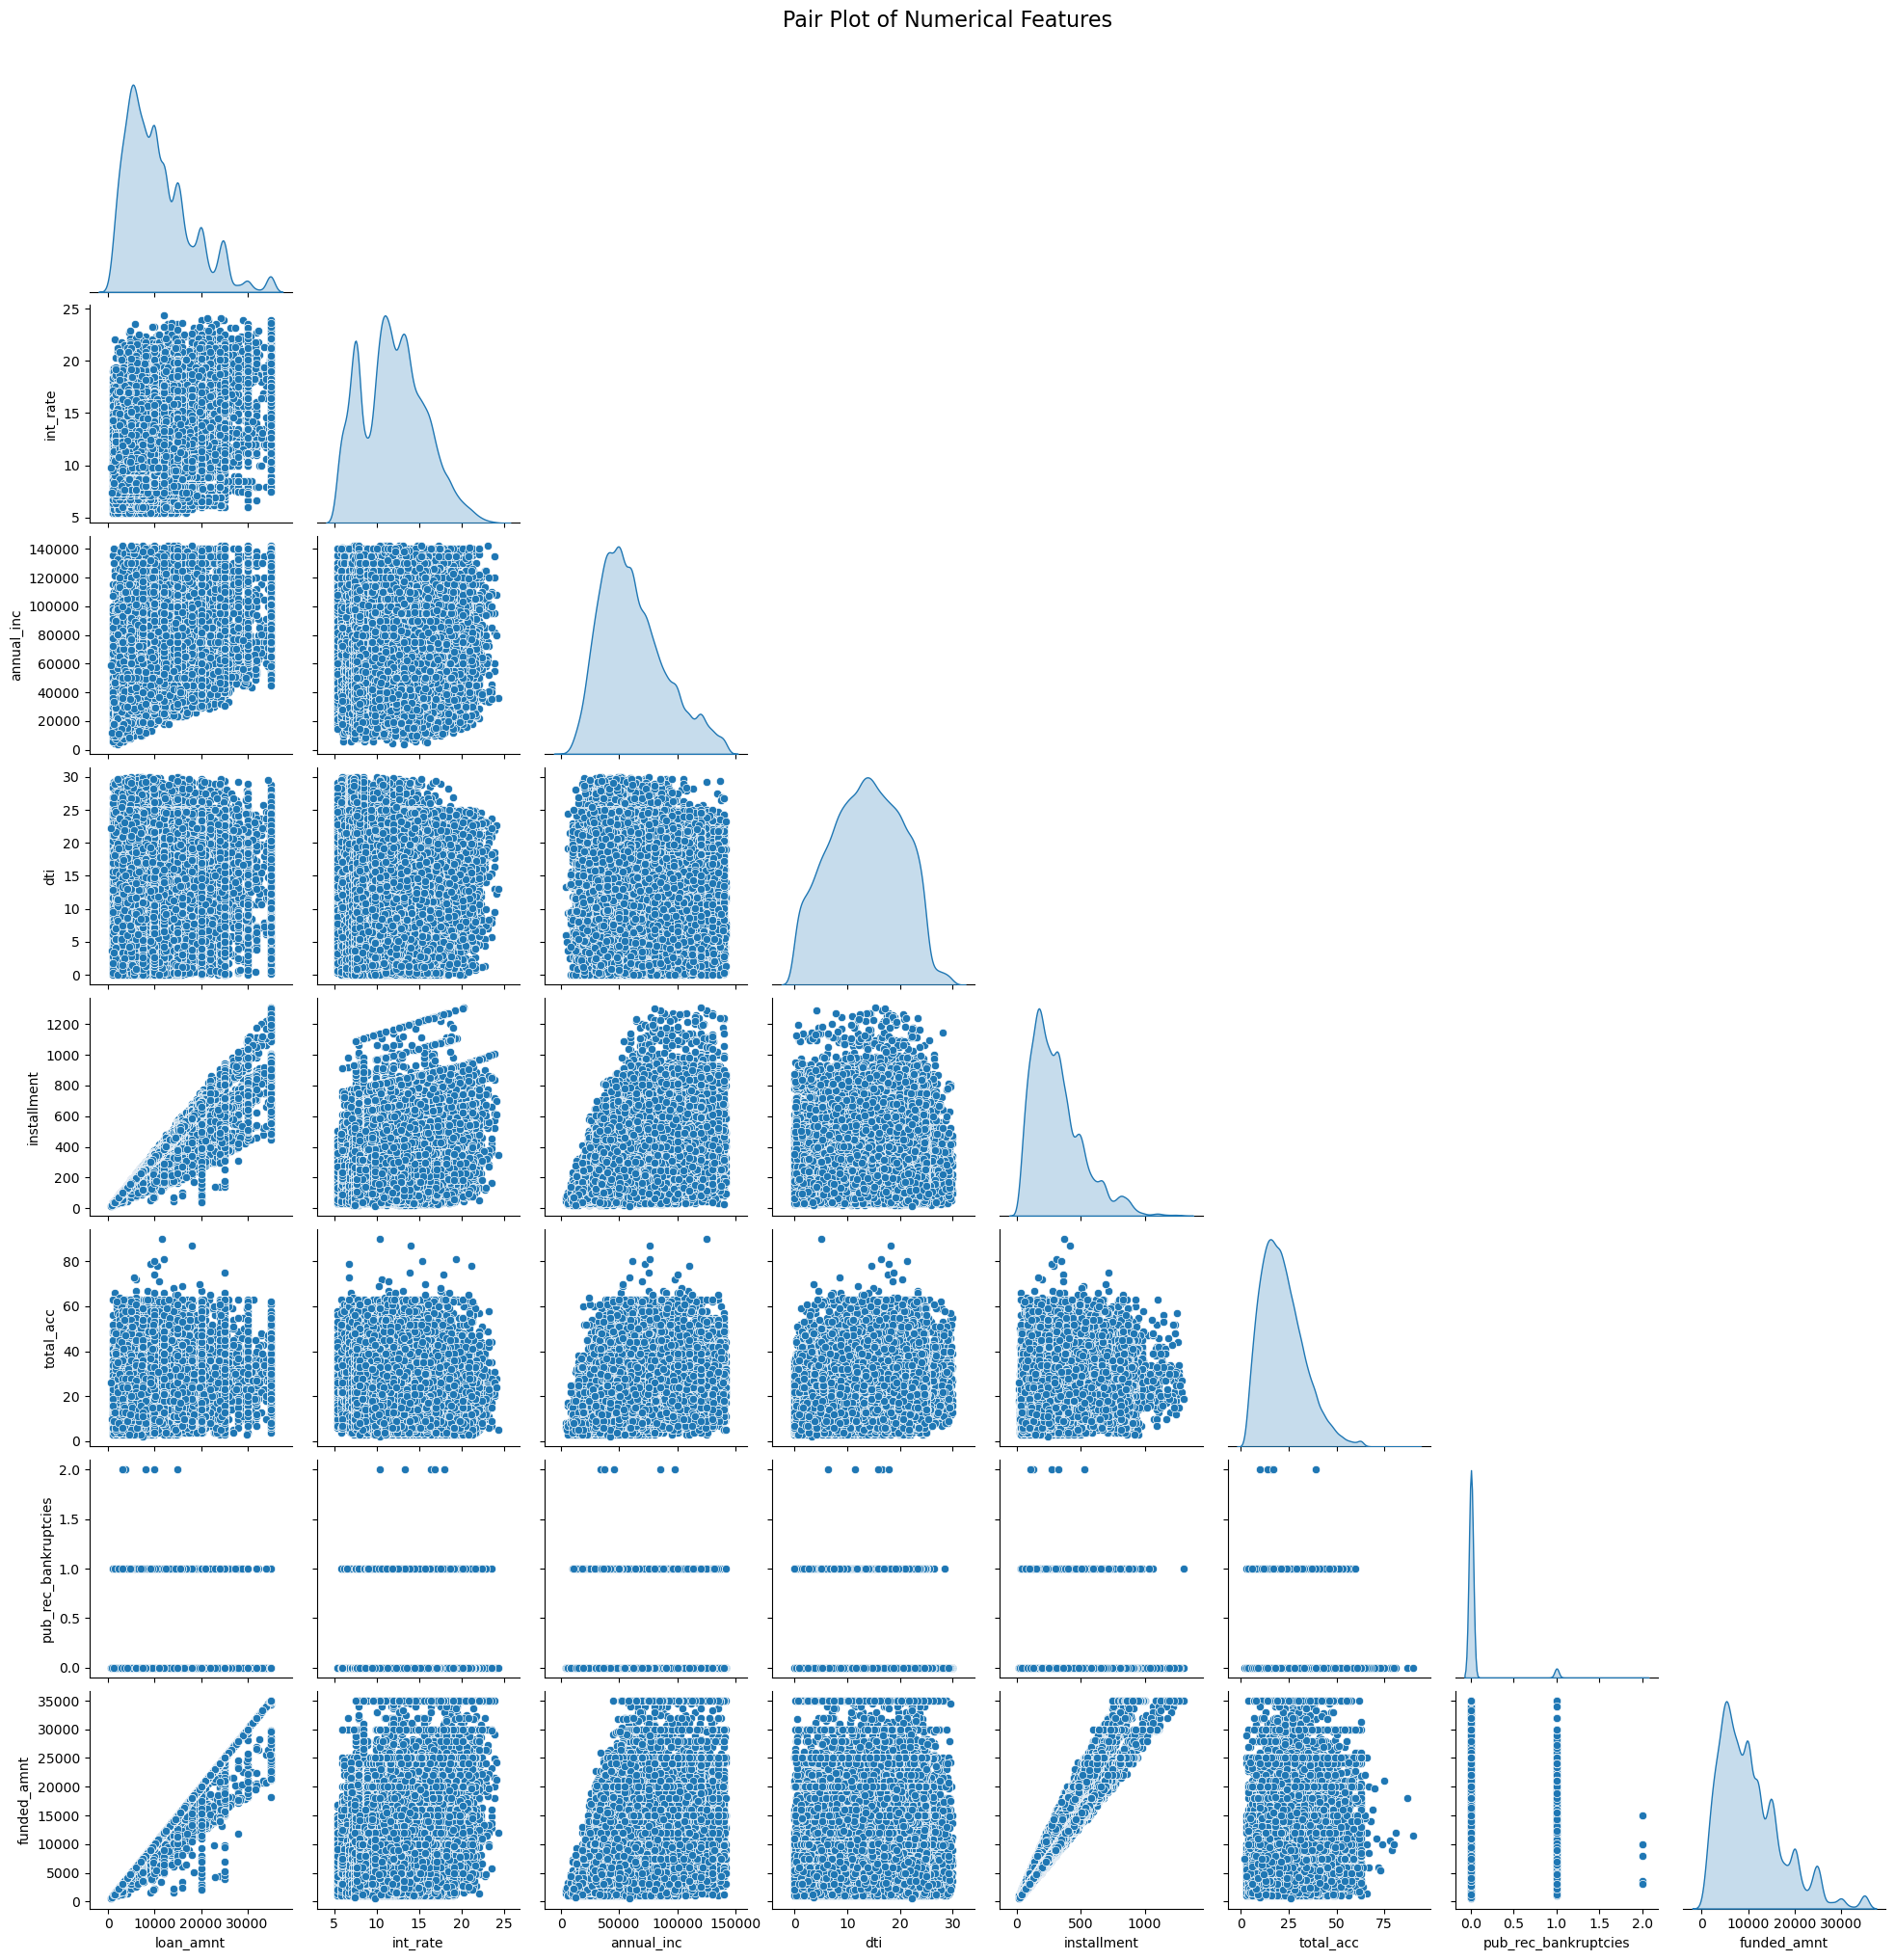

In [178]:
num_cols = ['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'installment', 'total_acc', 'pub_rec_bankruptcies','funded_amnt']

correlation_matrix = df_loan[num_cols].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap of Selected Numerical Features', fontsize=16)
plt.show()

sns.pairplot(df_loan[num_cols], diag_kind='kde', corner=True, height=2.5)
plt.suptitle('Pair Plot of Numerical Features', y=1.02, fontsize=16)
plt.show()


###### <span style="color:green"> Indicates a strong linear relationship. For example, `loan_amnt` might have a strong correlation with `installment`and `loan_amnt` with `funded_amnt`</span>

### Conclusion

Major Driving factor which can be used to predict the chance of defaulting and avoiding Credit Loss are:
* Annual Income
* Grade
* DTI
* Verification Status
* State


### Consideration

* More scrutiny while lending money to states like CA, FL, NY & TX
* Advisable to lend money after doing Source Verification
* Careful with Borrowers having high DTI value
* Scrutinize Borrowers who are having annual income in the range of 25K to 100K and who have 10+ years or less than 1 years of employments